## Algorithm #1: Principal Component Analysis (PCA)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# import dataset
myDF = pd.read_excel("/Users/rauns/Downloads/FOODS_update.xls") # input your own dataset here, could be csv or excel

### Data Preprocessing

In [3]:
myDF.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,1,2,3,4,5,6,...,11,12,13,14,15,16,17,18,19,20
0,Number,Country,Geographic Location,Capitol Latitude,Ground Coffe,Instant Coffe,Tea,Sweetner,Biscuits,Powder Soup,...,Apples,Oranges,Tin Fruit,Jam,Garlic,Butter,Margarine,Olive Oil,Yoghurt,Crisp Bread
1,1,Germany,C,3,90,49,88,19,57,51,...,81,75,44,71,22,91,85,74,30,26
2,2,Italy,S,1,82,10,60,2,55,41,...,67,71,9,46,80,66,24,94,5,18
3,3,France,C,2,88,42,63,4,76,53,...,87,84,40,45,88,94,47,36,57,3
4,4,Holland,X,3,96,62,98,32,62,67,...,83,89,61,81,15,31,97,13,53,15
5,5,Belgium,X,3,94,38,48,11,74,37,...,76,76,42,57,29,84,80,83,20,5
6,6,Luxembou,X,2,97,61,86,28,79,73,...,85,94,83,20,91,94,94,84,31,24
7,7,England,U,3,27,86,99,22,91,55,...,76,68,89,91,11,95,94,57,11,28
8,8,Portugal,S,1,72,26,77,2,22,34,...,22,51,8,16,89,65,78,92,6,9
9,9,Austria,C,2,55,31,61,15,29,33,...,49,42,14,41,51,51,72,28,13,11


In [4]:
myDF.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',            1,
                  2,            3,            4,            5,            6,
                  7,            8,            9,           10,           11,
                 12,           13,           14,           15,           16,
                 17,           18,           19,           20],
      dtype='object')

In [5]:
new_header = myDF.iloc[0] #grab the first row for the header
myDF = myDF[1:] #take the data less the header row
myDF.columns = new_header #set the header row as the df header
myDF.head(10)

,Number,Country,Geographic Location,Capitol Latitude,Ground Coffe,Instant Coffe,Tea,Sweetner,Biscuits,Powder Soup,...,Apples,Oranges,Tin Fruit,Jam,Garlic,Butter,Margarine,Olive Oil,Yoghurt,Crisp Bread
1,1,Germany,C,3,90,49,88,19,57,51,...,81,75,44,71,22,91,85,74,30,26
2,2,Italy,S,1,82,10,60,2,55,41,...,67,71,9,46,80,66,24,94,5,18
3,3,France,C,2,88,42,63,4,76,53,...,87,84,40,45,88,94,47,36,57,3
4,4,Holland,X,3,96,62,98,32,62,67,...,83,89,61,81,15,31,97,13,53,15
5,5,Belgium,X,3,94,38,48,11,74,37,...,76,76,42,57,29,84,80,83,20,5
6,6,Luxembou,X,2,97,61,86,28,79,73,...,85,94,83,20,91,94,94,84,31,24
7,7,England,U,3,27,86,99,22,91,55,...,76,68,89,91,11,95,94,57,11,28
8,8,Portugal,S,1,72,26,77,2,22,34,...,22,51,8,16,89,65,78,92,6,9
9,9,Austria,C,2,55,31,61,15,29,33,...,49,42,14,41,51,51,72,28,13,11
10,10,Switzerl,C,2,73,72,85,25,31,69,...,79,70,46,61,64,82,48,61,48,30


In [6]:
len(myDF.columns)

24

In [7]:
myDF.columns

Index(['Number', 'Country', 'Geographic Location', 'Capitol Latitude',
       'Ground Coffe', 'Instant Coffe', 'Tea', 'Sweetner', 'Biscuits',
       'Powder Soup', 'Tin Soup', 'Instant Potatoes', 'Frozen Fish',
       'Frozen Vegetables', 'Apples', 'Oranges', 'Tin Fruit', 'Jam', 'Garlic',
       'Butter', 'Margarine', 'Olive Oil', 'Yoghurt', 'Crisp Bread'],
      dtype='object', name=0)

In [8]:
pca_df = myDF.copy()
pca_df.drop(["Number", "Geographic Location", "Country"], axis=1, inplace=True)
pca_df

,Capitol Latitude,Ground Coffe,Instant Coffe,Tea,Sweetner,Biscuits,Powder Soup,Tin Soup,Instant Potatoes,Frozen Fish,...,Apples,Oranges,Tin Fruit,Jam,Garlic,Butter,Margarine,Olive Oil,Yoghurt,Crisp Bread
1,3,90,49,88,19,57,51,19,21,27,...,81,75,44,71,22,91,85,74,30,26
2,1,82,10,60,2,55,41,3,2,4,...,67,71,9,46,80,66,24,94,5,18
3,2,88,42,63,4,76,53,11,23,11,...,87,84,40,45,88,94,47,36,57,3
4,3,96,62,98,32,62,67,43,7,14,...,83,89,61,81,15,31,97,13,53,15
5,3,94,38,48,11,74,37,23,9,13,...,76,76,42,57,29,84,80,83,20,5
6,2,97,61,86,28,79,73,12,7,26,...,85,94,83,20,91,94,94,84,31,24
7,3,27,86,99,22,91,55,76,17,20,...,76,68,89,91,11,95,94,57,11,28
8,1,72,26,77,2,22,34,1,5,20,...,22,51,8,16,89,65,78,92,6,9
9,2,55,31,61,15,29,33,1,5,15,...,49,42,14,41,51,51,72,28,13,11
10,2,73,72,85,25,31,69,10,17,19,...,79,70,46,61,64,82,48,61,48,30


In [9]:
pca_df.isnull().sum()

0
Capitol Latitude     0
Ground Coffe         0
Instant Coffe        0
Tea                  0
Sweetner             1
Biscuits             1
Powder Soup          0
Tin Soup             0
Instant Potatoes     0
Frozen Fish          0
Frozen Vegetables    0
Apples               0
Oranges              0
Tin Fruit            0
Jam                  0
Garlic               0
Butter               0
Margarine            0
Olive Oil            0
Yoghurt              1
Crisp Bread          0
dtype: int64

In [10]:
pca_df = pca_df.fillna(pca_df.mean())
pca_df.head(15)

,Capitol Latitude,Ground Coffe,Instant Coffe,Tea,Sweetner,Biscuits,Powder Soup,Tin Soup,Instant Potatoes,Frozen Fish,...,Apples,Oranges,Tin Fruit,Jam,Garlic,Butter,Margarine,Olive Oil,Yoghurt,Crisp Bread
1,3,90,49,88,19.0,57.000000,51,19,21,27,...,81,75,44,71,22,91,85,74,30.000000,26
2,1,82,10,60,2.0,55.000000,41,3,2,4,...,67,71,9,46,80,66,24,94,5.000000,18
3,2,88,42,63,4.0,76.000000,53,11,23,11,...,87,84,40,45,88,94,47,36,57.000000,3
4,3,96,62,98,32.0,62.000000,67,43,7,14,...,83,89,61,81,15,31,97,13,53.000000,15
5,3,94,38,48,11.0,74.000000,37,23,9,13,...,76,76,42,57,29,84,80,83,20.000000,5
6,2,97,61,86,28.0,79.000000,73,12,7,26,...,85,94,83,20,91,94,94,84,31.000000,24
7,3,27,86,99,22.0,91.000000,55,76,17,20,...,76,68,89,91,11,95,94,57,11.000000,28
8,1,72,26,77,2.0,22.000000,34,1,5,20,...,22,51,8,16,89,65,78,92,6.000000,9
9,2,55,31,61,15.0,29.000000,33,1,5,15,...,49,42,14,41,51,51,72,28,13.000000,11
10,2,73,72,85,25.0,31.000000,69,10,17,19,...,79,70,46,61,64,82,48,61,48.000000,30


In [11]:
pca_df.isnull().sum()

0
Capitol Latitude     0
Ground Coffe         0
Instant Coffe        0
Tea                  0
Sweetner             0
Biscuits             0
Powder Soup          0
Tin Soup             0
Instant Potatoes     0
Frozen Fish          0
Frozen Vegetables    0
Apples               0
Oranges              0
Tin Fruit            0
Jam                  0
Garlic               0
Butter               0
Margarine            0
Olive Oil            0
Yoghurt              0
Crisp Bread          0
dtype: int64

### Applying PCA

In [12]:
scaler = StandardScaler()
scaler.fit(pca_df)

StandardScaler()

In [13]:
scaled_data = scaler.transform(pca_df)
scaled_data

array([[ 2.69974624e-01,  5.10355528e-01,  4.35028413e-01,
         5.29208904e-01,  9.80580676e-02, -1.97561849e-01,
         1.33892385e-01,  3.51886964e-02,  8.89943818e-01,
         3.78608530e-01,  4.13845946e-01,  8.33438697e-01,
         3.31182408e-01,  9.15935482e-02,  7.22848292e-01,
        -6.04972941e-01,  7.50146505e-01,  6.10640441e-01,
         7.09445710e-01,  5.33188800e-01, -7.22186969e-02],
       [-1.45786297e+00,  1.53385541e-01, -1.30508524e+00,
        -1.03056471e+00, -1.56892908e+00, -3.05322858e-01,
        -5.35569542e-01, -7.83748238e-01, -1.15962376e+00,
        -1.32051268e+00, -1.12041219e+00,  1.10146083e-02,
         3.67980453e-02, -1.46272121e+00, -4.19994857e-01,
         1.12245749e+00, -4.84662557e-01, -1.73575747e+00,
         1.42560542e+00, -8.74880214e-01, -4.02361311e-01],
       [-5.93944172e-01,  4.21113031e-01,  1.22700322e-01,
        -8.63446106e-01, -1.37281295e+00,  8.26167733e-01,
         2.67784771e-01, -3.74279771e-01,  1.10568777e

In [14]:
pca = PCA(n_components = 2) # n components is the number of components you want to reduce the dimensions to 

In [15]:
pca.fit(scaled_data)

PCA(n_components=2)

In [16]:
components = pca.transform(scaled_data)

In [17]:
scaled_data.shape

(16, 21)

In [18]:
components.shape

(16, 2)

In [19]:
pca_values_df = pd.DataFrame(data = components, columns = ['Principal Component 1', 'Principal Component 2'])
pca_values_df.insert(0, "Country", myDF["Country"].values, True)
pca_values_df

,Country,Principal Component 1,Principal Component 2
0,Germany,-1.359194,-0.311400
1,Italy,4.042737,-0.174310
2,France,0.986125,-2.319333
3,Holland,-2.537098,-2.071287
4,Belgium,0.736194,-0.619698
5,Luxembou,-1.168563,-2.475186
6,England,-3.771059,-2.249196
7,Portugal,4.892057,1.403905
8,Austria,3.103012,1.337605
9,Switzerl,-0.125554,-1.801555


### Visualization

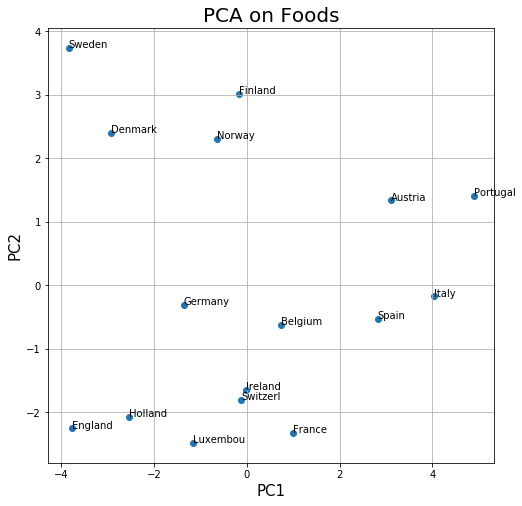

In [20]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA on Foods', fontsize = 20)

plt.scatter(pca_values_df['Principal Component 1'], pca_values_df['Principal Component 2'])

n = pca_values_df['Country'].values.copy()
x = pca_values_df['Principal Component 1'].values.copy()
y = pca_values_df['Principal Component 2'].values.copy()


for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))
    
ax.grid()

References:
    - https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
    - https://www.youtube.com/watch?v=QdBy02ExhGI